In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway, ttest_ind
import warnings
warnings.filterwarnings('ignore')

In [72]:
## load data
df = pd.read_excel('DA_prelim_task.xlsx')
df.head()

,S. No,Name,Age,Tenure,Job Role,Zone,Location,Contractual/Full time,I receive clear instructions and guidance from my supervisors.,I feel comfortable approaching my supervisors with questions or concerns.,...,I try to acquire new knowledge and new skills through self learning and peer learning.,This is a physically safe place to work.,While on work utmost priority is given on the safety,\nI feel that there is no discrimination and harassment in the organization,\nI am satisfied with health insurance and medical insurance provided by the organization.,"\nI am satisfied with company’s leave policy (sick leave, paid leave etc)",\nI get my salary/wages on time,"\nThe compensation, benefits and facilities provided by the organization is better than among the top three in Asansol.",Any comments,Unnamed: 25
0,1.0,Samir Chattapadhyay,"59 Years, 7 Months",32.0,Sub-station Operator,DPS,Sen Raleigh,Full Time,Strongly agree,Strongly agree,...,Agree,Agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly Agree,Number of consumers are less that should be in...,NaN
1,2.0,Debashis Ball,"51 Years, 5 Months",32.0,Sub-station Operator,DPS,Santoria station,Full Time,Strongly agree,Strongly agree,...,Agree,Agree,Strongly Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly Agree,Increase of number of consumers would be better,NaN
2,3.0,Sanjoy Chatterjee,"53 Years, 10 Months",32.0,Sub-station Operator,DPS,Parbelia,Full Time,Strongly agree,Strongly agree,...,Agree,Strongly Agree,Strongly Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly Agree,NaN,NaN
3,4.0,Shyamal Kumar Mondal,"57 Years, 1 Months",37.0,Sub-station Operator,DPS,OED Sub station,Full Time,Strongly agree,Strongly agree,...,Strongly agree,Strongly Agree,Strongly Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,NaN,NaN
4,5.0,Milan Banerjee,"49 Years, 6 Months",20.0,Sub-station Operator,DPS,Gopalpur Station,Full Time,Strongly agree,Strongly agree,...,Agree,Strongly Agree,Strongly Agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly Agree,Promotion policy should be revised. Growth opp...,NaN


## Data exploring and cleaning

In [73]:
df.shape

(79, 26)

In [74]:
df.isnull().sum()

S. No                                                                                                                       4
Name                                                                                                                        3
Age                                                                                                                         4
Tenure                                                                                                                      4
Job Role                                                                                                                    4
Zone                                                                                                                        4
Location                                                                                                                    4
Contractual/Full time                                                                                                 

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 26 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                  --------------  -----  
 0   S. No                                                                                                                   75 non-null     float64
 1   Name                                                                                                                    76 non-null     object 
 2   Age                                                                                                                     75 non-null     object 
 3   Tenure                                                                                                                  75 non-null     float64
 4 

In [76]:
## remove null unwated columns
df.drop(['Unnamed: 25'],inplace=True,axis=1)

In [77]:
df=df.dropna()

In [78]:
df.isnull().sum()

S. No                                                                                                                      0
Name                                                                                                                       0
Age                                                                                                                        0
Tenure                                                                                                                     0
Job Role                                                                                                                   0
Zone                                                                                                                       0
Location                                                                                                                   0
Contractual/Full time                                                                                                      0


In [79]:
df.drop(['S. No'],axis=1,inplace=True)

In [80]:
## converting age column into numerical column
def fun(x):
    return x.split(',')[0]
df['Age'] = df['Age'].apply(lambda x: fun(x))
df['Age'] = df['Age'].str.replace('Years','').astype('int64')

In [81]:
## converting Tenure to numerical form
df['Tenure'] = df['Tenure'].astype('int64')

In [82]:
df.head()

,Name,Age,Tenure,Job Role,Zone,Location,Contractual/Full time,I receive clear instructions and guidance from my supervisors.,I feel comfortable approaching my supervisors with questions or concerns.,The organization values open and honest communication,...,I get on the job training by my supervisor,I try to acquire new knowledge and new skills through self learning and peer learning.,This is a physically safe place to work.,While on work utmost priority is given on the safety,\nI feel that there is no discrimination and harassment in the organization,\nI am satisfied with health insurance and medical insurance provided by the organization.,"\nI am satisfied with company’s leave policy (sick leave, paid leave etc)",\nI get my salary/wages on time,"\nThe compensation, benefits and facilities provided by the organization is better than among the top three in Asansol.",Any comments
0,Samir Chattapadhyay,59,32,Sub-station Operator,DPS,Sen Raleigh,Full Time,Strongly agree,Strongly agree,Strongly agree,...,Strongly agree,Agree,Agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly Agree,Number of consumers are less that should be in...
1,Debashis Ball,51,32,Sub-station Operator,DPS,Santoria station,Full Time,Strongly agree,Strongly agree,Strongly agree,...,Strongly agree,Agree,Agree,Strongly Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly Agree,Increase of number of consumers would be better
4,Milan Banerjee,49,20,Sub-station Operator,DPS,Gopalpur Station,Full Time,Strongly agree,Strongly agree,Strongly agree,...,Strongly agree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly Agree,Promotion policy should be revised. Growth opp...
5,Mimbahadur Thapa,54,33,Sub-station Operator,DPS,Victoria,Full Time,Strongly agree,Strongly agree,Strongly agree,...,Strongly agree,Strongly agree,Strongly Disagree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly Agree,1) Place is unsafe due to snakes\n2) Poor toilets
7,Tapas Maji,58,35,Sub-station Operator,DPS,DPS grid,Full Time,Strongly agree,Strongly disagree,Strongly disagree,...,Strongly agree,Strongly agree,Strongly Agree,Strongly Agree,Strongly agree,Disagree,Strongly agree,Strongly agree,Disagree,+ve points\nOpportunity to do public help and ...


## Data visualization

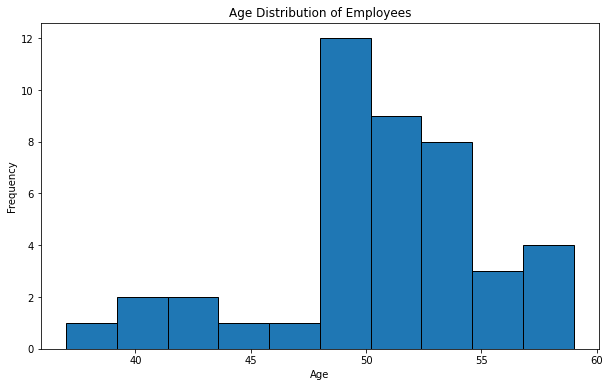

In [83]:
## age distribution visualization
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Employees')
plt.show()

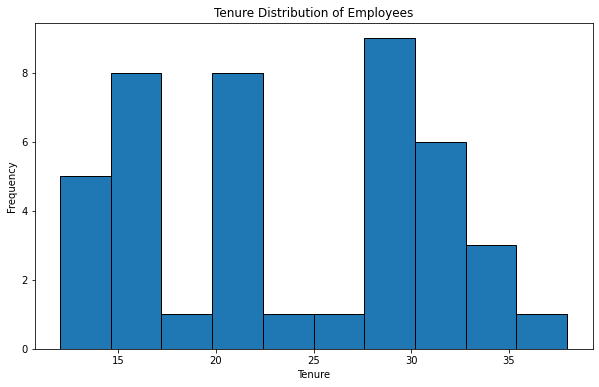

In [84]:
## age distribution visualization
plt.figure(figsize=(10, 6))
plt.hist(df['Tenure'], bins=10, edgecolor='black')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Tenure Distribution of Employees')
plt.show()

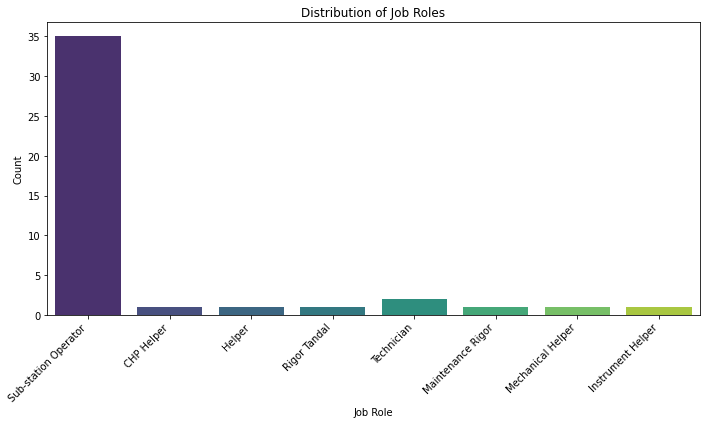

In [85]:
## job role distribution visualization
plt.figure(figsize=(10, 6))  
sns.countplot(x='Job Role', data=df, palette='viridis')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.title('Distribution of Job Roles')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

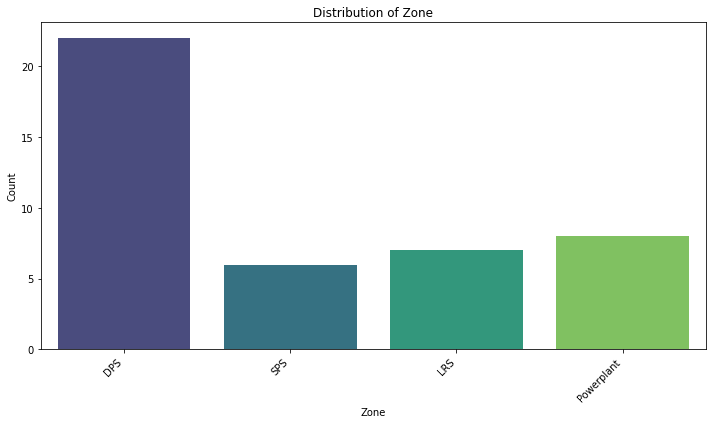

In [86]:
## Zone distribution visualization
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='Zone', data=df, palette='viridis')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.title('Distribution of Zone')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

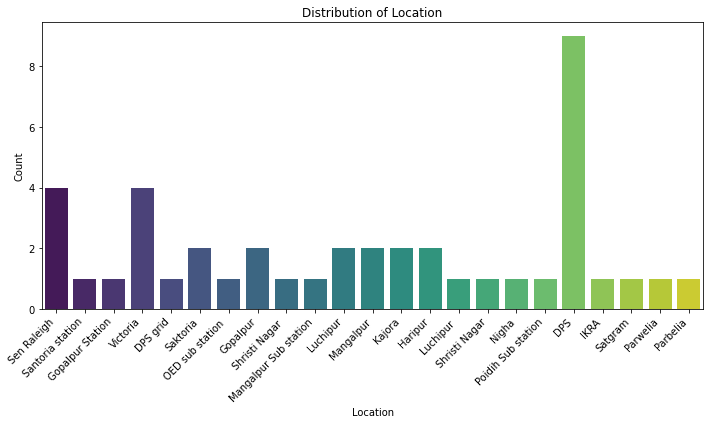

In [87]:
## location visualization
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='Location', data=df, palette='viridis')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Distribution of Location')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

#### Distribution of responses

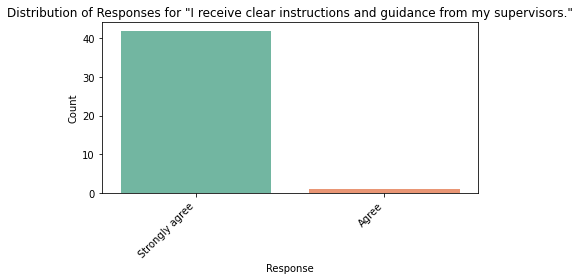

In [88]:
## distribution of I receive clear instructions and guidance from my supervisors.
sns.countplot(x='I receive clear instructions and guidance from my supervisors.', data=df, palette='Set2')
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Distribution of Responses for "I receive clear instructions and guidance from my supervisors."')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()


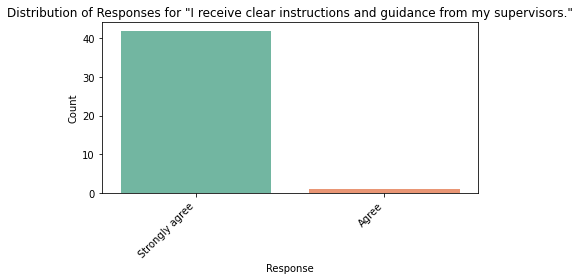

In [89]:
## distribution of I receive clear instructions and guidance from my supervisors.
sns.countplot(x='I receive clear instructions and guidance from my supervisors.', data=df, palette='Set2')
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Distribution of Responses for "I receive clear instructions and guidance from my supervisors."')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

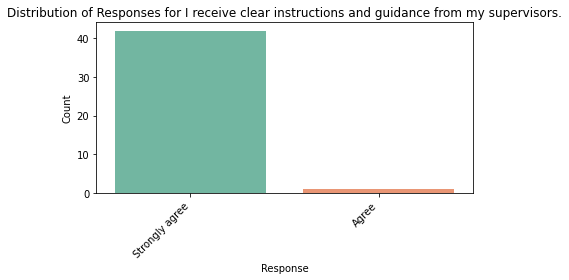

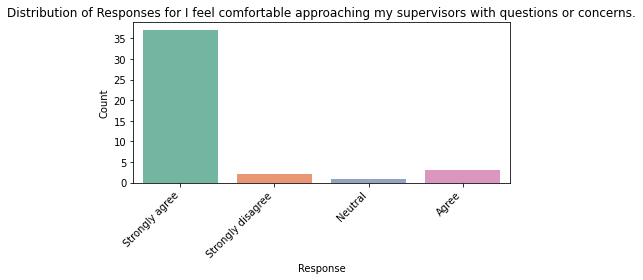

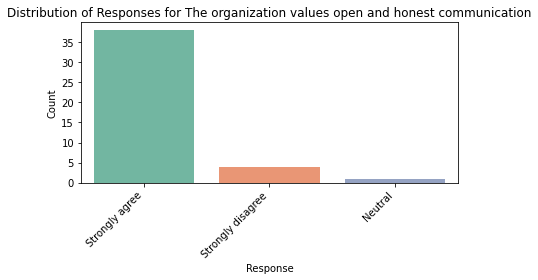

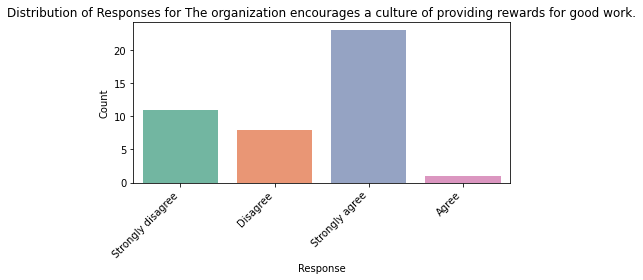

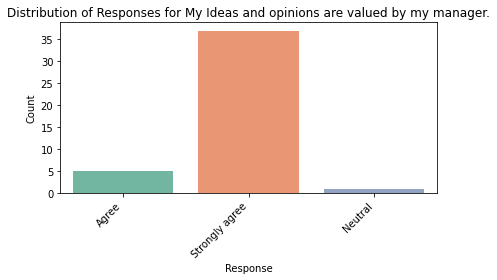

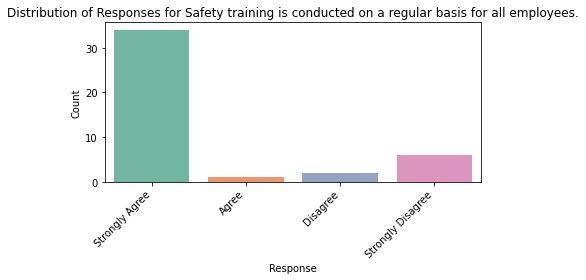

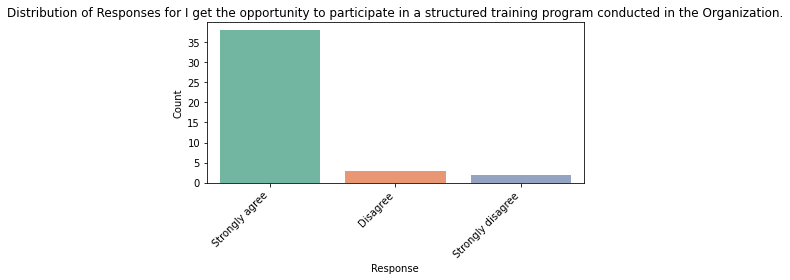

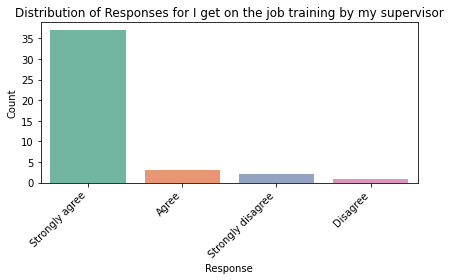

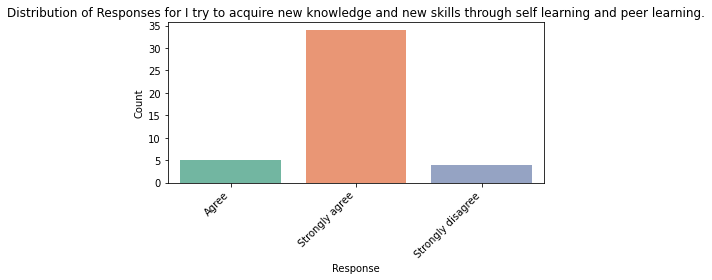

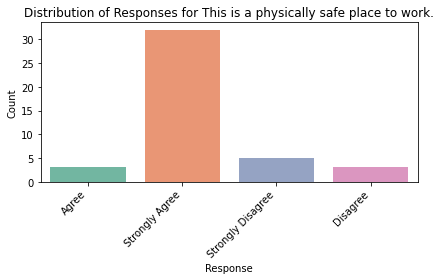

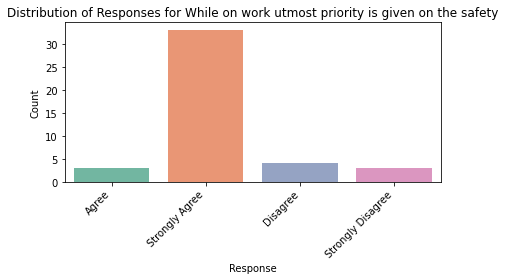

In [90]:
## distribution of responses
columns = df.columns[7:-6]
for col in columns:
    
    sns.countplot(x=col, data=df, palette='Set2')
    plt.xlabel('Response')
    plt.ylabel('Count')
    plt.title(f'Distribution of Responses for {col}')
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout() 
    plt.show()

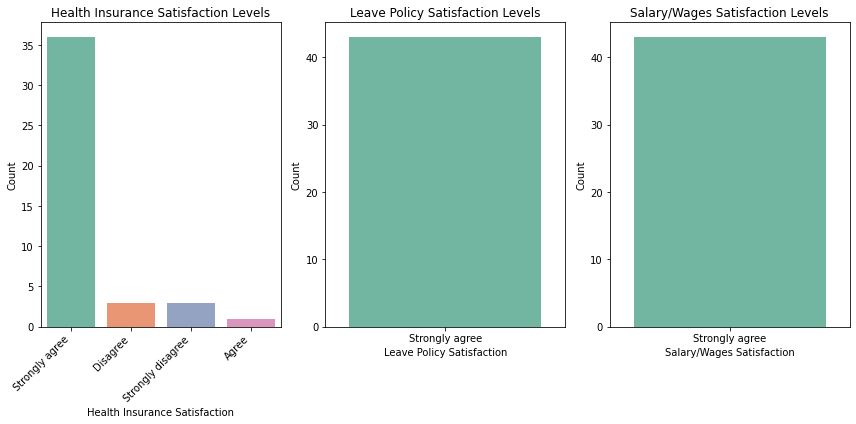

In [91]:
# satisfaction levels for 'health_insurance', 'leave_policy', and 'salary_wages'  
plt.figure(figsize=(12, 6)) 
# Bar plot for health insurance satisfaction
plt.subplot(1, 3, 1)
sns.countplot(x='\nI am satisfied with health insurance and medical insurance provided by the organization.', data=df, palette='Set2')
plt.xlabel('Health Insurance Satisfaction')
plt.ylabel('Count')
plt.title('Health Insurance Satisfaction Levels')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 

# Bar plot for leave policy satisfaction
plt.subplot(1, 3, 2)
sns.countplot(x='\nI am satisfied with company’s leave policy (sick leave, paid leave etc)', data=df, palette='Set2')
plt.xlabel('Leave Policy Satisfaction')
plt.ylabel('Count')
plt.title('Leave Policy Satisfaction Levels')

# Bar plot for salary/wages satisfaction
plt.subplot(1, 3, 3)
sns.countplot(x='\nI get my salary/wages on time', data=df, palette='Set2')
plt.xlabel('Salary/Wages Satisfaction')
plt.ylabel('Count')
plt.title('Salary/Wages Satisfaction Levels')

plt.tight_layout()  
plt.show()



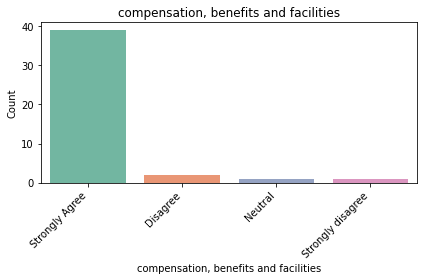

In [92]:
sns.countplot(x='\nThe compensation, benefits and facilities provided by the organization is better than among the top three in Asansol.', data=df, palette='Set2')
plt.xlabel('compensation, benefits and facilities')
plt.ylabel('Count')
plt.title('compensation, benefits and facilities')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 

#### co-relation between data

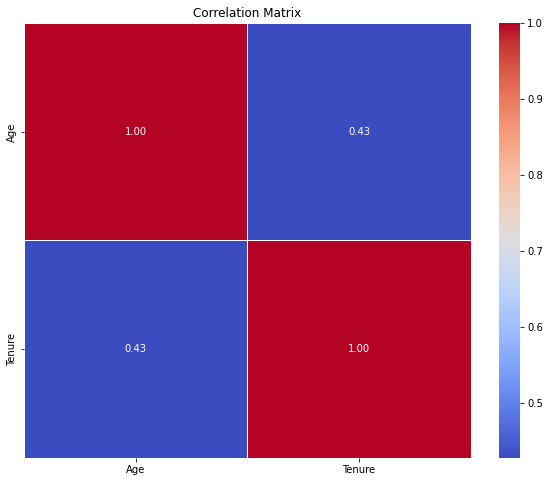

In [93]:
## relation in numreical data
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Zone                  DPS  LRS  Powerplant  SPS
Job Role                                       
CHP Helper              0    0           1    0
Helper                  0    0           1    0
Instrument Helper       0    0           1    0
Maintenance Rigor       0    0           1    0
Mechanical Helper       0    0           1    0
Rigor Tandal            0    0           1    0
Sub-station Operator   21    7           1    6
Technician              1    0           1    0


<Figure size 1080x1080 with 0 Axes>

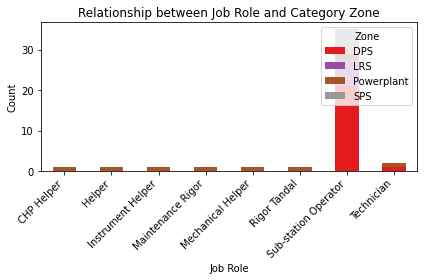

In [94]:
## relationship between Job roles and Zone lying in it

cross_tab = pd.crosstab(df['Job Role'], df['Zone'])

print(cross_tab)

plt.figure(figsize=(15, 15))  
cross_tab.plot(kind='bar', stacked=True, colormap='Set1', rot=0)
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.title('Relationship between Job Role and Category Zone')
plt.legend(title='Zone', loc='upper right')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

Location              DPS  DPS grid  Gopalpur  Gopalpur Station  Haripur  \
Job Role                                                                   
CHP Helper              1         0         0                 0        0   
Helper                  1         0         0                 0        0   
Instrument Helper       1         0         0                 0        0   
Maintenance Rigor       1         0         0                 0        0   
Mechanical Helper       1         0         0                 0        0   
Rigor Tandal            1         0         0                 0        0   
Sub-station Operator    1         1         2                 1        2   
Technician              2         0         0                 0        0   

Location              IKRA  Kajora  Luchipur  Luchipur   Mangalpur  ...  \
Job Role                                                            ...   
CHP Helper               0       0         0          0          0  ...   
Helper        

<Figure size 1080x1080 with 0 Axes>

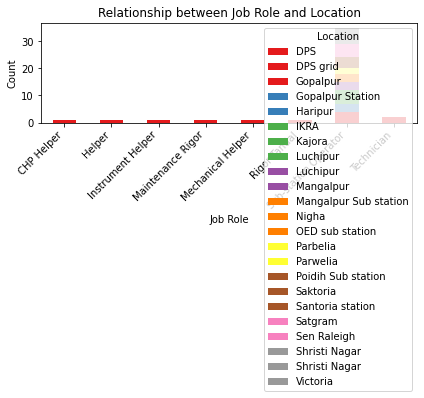

In [95]:
## relationship between Job roles and Location lying under

cross_tab = pd.crosstab(df['Job Role'], df['Location'])

print(cross_tab)

plt.figure(figsize=(15, 15))  
cross_tab.plot(kind='bar', stacked=True, colormap='Set1', rot=0)
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.title('Relationship between Job Role and Location')
plt.legend(title='Location', loc='upper right')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

Zone                   DPS  LRS  Powerplant  SPS
Location                                        
DPS                      1    0           8    0
DPS grid                 1    0           0    0
Gopalpur                 2    0           0    0
Gopalpur Station         1    0           0    0
Haripur                  0    2           0    0
IKRA                     0    0           0    1
Kajora                   0    2           0    0
Luchipur                 0    1           0    1
Luchipur                 0    1           0    0
Mangalpur                0    1           0    1
Mangalpur Sub station    0    0           0    1
Nigha                    0    0           0    1
OED sub station          1    0           0    0
Parbelia                 1    0           0    0
Parwelia                 1    0           0    0
Poidih Sub station       1    0           0    0
Saktoria                 2    0           0    0
Santoria station         1    0           0    0
Satgram             

<Figure size 1080x1080 with 0 Axes>

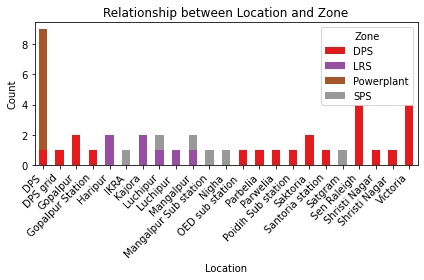

In [96]:
## relationship between Location and Zone lying in it

cross_tab = pd.crosstab(df['Location'], df['Zone'])

print(cross_tab)

plt.figure(figsize=(15, 15))  
cross_tab.plot(kind='bar', stacked=True, colormap='Set1', rot=0)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Relationship between Location and Zone')
plt.legend(title='Zone', loc='upper right')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

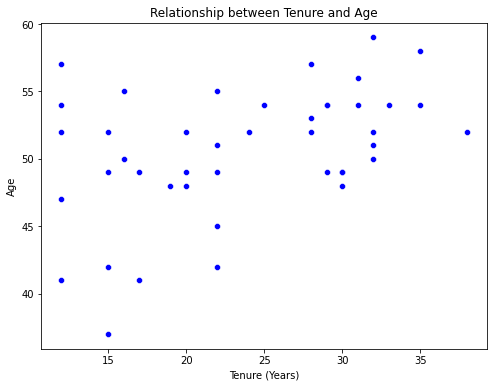

In [97]:
## relationship between tenure and age:
plt.figure(figsize=(8, 6))  
sns.scatterplot(x='Tenure', y='Age', data=df, color='blue')
plt.xlabel('Tenure (Years)')
plt.ylabel('Age')
plt.title('Relationship between Tenure and Age')
plt.show()


## Analysis and Insights

the age group with the highest number of employees is 50


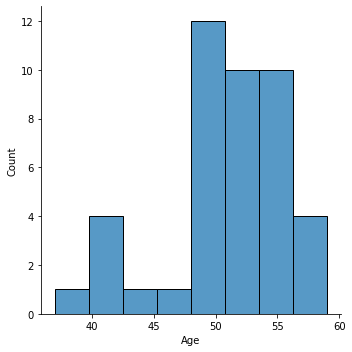

In [98]:
## From the age distribution, identify the age group with the highest number of employees
sns.displot(df['Age'])
print("the age group with the highest number of employees is 50")

,Name,Age,Tenure,Job Role,Zone,Location,Contractual/Full time,I receive clear instructions and guidance from my supervisors.,I feel comfortable approaching my supervisors with questions or concerns.,The organization values open and honest communication,...,I get on the job training by my supervisor,I try to acquire new knowledge and new skills through self learning and peer learning.,This is a physically safe place to work.,While on work utmost priority is given on the safety,\nI feel that there is no discrimination and harassment in the organization,\nI am satisfied with health insurance and medical insurance provided by the organization.,"\nI am satisfied with company’s leave policy (sick leave, paid leave etc)",\nI get my salary/wages on time,"\nThe compensation, benefits and facilities provided by the organization is better than among the top three in Asansol.",Any comments
52,Shashi Bhushan Singh,37,15,Sub-station Operator,SPS,IKRA,Full Time,Strongly agree,Strongly agree,Strongly agree,...,Agree,Strongly agree,Strongly Disagree,Strongly Disagree,Strongly agree,Disagree,Strongly agree,Strongly agree,Strongly Agree,Security issue in company\nMedical policy shou...


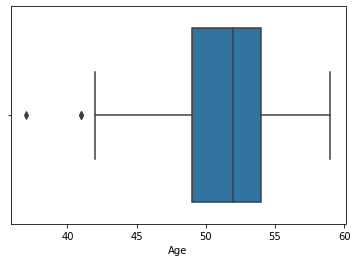

In [99]:
## check for outliers
sns.boxplot(df['Age'])
df[df['Age']<40]

<AxesSubplot:xlabel='Tenure'>

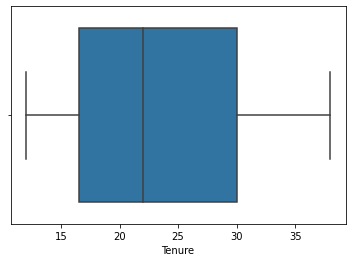

In [100]:
sns.boxplot(df['Tenure'])

In [101]:
## remove outliers
z_threshold = 3

# Calculate the Z-scores for each column in the DataFrame
z_scores = np.abs((df - df.mean()) / df.std())

# Remove rows with any column having a Z-score greater than the threshold
data_no_outliers = df[(z_scores < z_threshold).all(axis=1)]

In [102]:
## Hence no outliers found in the data set

#### Analysis test such as Anova-test, t-test etc.

: Null Hypothesis (H0) is responses of employees from all the 4 zones are same.

Alternate Hypothesis (H1)is responses of employees from all the 4 zones are not same


In [103]:
import pandas as pd
from scipy.stats import f_oneway

# Replace the responses with numerical values
response_mapping = {
    'Strongly agree': 0,
    'Agree': 1,
    'Neutral': 2,
    'Disagree': 3,
    'Strongly disagree': 4
}


columns_to_convert = df.columns[18:-1]

for column in columns_to_convert:
    df[column] = df[column].map(response_mapping)

# Perform the ANOVA test
zones = df['Zone'].unique()
anova_results = {}
for column in columns_to_convert:
    data_by_zone = [df[df['Zone'] == zone][column] for zone in zones]
    anova_results[column] = f_oneway(*data_by_zone)

# Print the ANOVA results
for column, result in anova_results.items():
    print(f"Column: {column}")
    print(f"F-statistic: {result.statistic}")
    print(f"P-value: {result.pvalue}\n")
    if result.pvalue < 0.05:
        print("Reject the null hypothesis\n")
    else:
        print("Accept the null hypothesis\n")    


Column: 
I feel that there is no discrimination and harassment in the organization
F-statistic: 0.6348837209302325
P-value: 0.5970209147981846

Accept the null hypothesis

Column: 
I am satisfied with health insurance and medical insurance provided by the organization.
F-statistic: 0.8460896380625562
P-value: 0.4770801604840501

Accept the null hypothesis

Column: 
I am satisfied with company’s leave policy (sick leave, paid leave etc)
F-statistic: nan
P-value: nan

Accept the null hypothesis

Column: 
I get my salary/wages on time
F-statistic: nan
P-value: nan

Accept the null hypothesis

Column: 
The compensation, benefits and facilities provided by the organization is better than among the top three in Asansol.
F-statistic: nan
P-value: nan

Accept the null hypothesis

